In [68]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [69]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42be8636db0fcb7f1ec0e7fc3e2125ba


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [70]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 ==0 and i >=50):
        set_count += 1
        record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data loading is complete.
    print("-----------------------")
    print("Data Retrieval Complete")
    print("-----------------------") 
    
       

Beginning Data Retrieval    
-----------------------------
Processing Record 1 of Set 1 | fremont
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 2 of Set 1 | georgetown
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 3 of Set 1 | cape town
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 4 of Set 1 | vaini
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 5 of Set 1 | chuy
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 6 of Set 1 | ribeira grande
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 7 of Set 1 | crixas
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 8 of Set 1 | bluff
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 9 of Set 1 | hobart
-----------

-----------------------
Data Retrieval Complete
-----------------------
Processing Record 74 of Set 2 | benoy
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 75 of Set 2 | severo-kurilsk
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 76 of Set 2 | belushya guba
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 77 of Set 2 | geraldton
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 78 of Set 2 | fairview
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 79 of Set 2 | maloy
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 80 of Set 2 | provideniya
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 81 of Set 2 | havoysund
-----------------------
Data Retrieval Complete
----------

-----------------------
Data Retrieval Complete
-----------------------
Processing Record 146 of Set 3 | meyungs
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 147 of Set 3 | vila velha
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 148 of Set 3 | japura
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 149 of Set 3 | kodiak
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 150 of Set 3 | cairns
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 151 of Set 3 | marzuq
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 152 of Set 3 | enid
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 154 of Set 4 | lasa
-----------------------
Data Retrieval Complete
-----------------------
Pro

City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 219 of Set 5 | sao filipe
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 220 of Set 5 | flinders
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 221 of Set 5 | halalo
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 222 of Set 5 | noumea
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 223 of Set 5 | saskylakh
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 224 of Set 5 | punta alta
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 225 of Set 5 | arraial do cabo
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 226 of Set 5 | kavieng
-----------------------
D

-----------------------
Data Retrieval Complete
-----------------------
Processing Record 291 of Set 6 | benguela
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 292 of Set 6 | bethel
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 293 of Set 6 | kavaratti
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 294 of Set 6 | rio verde de mato grosso
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 295 of Set 6 | shimoda
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 296 of Set 6 | fairbanks
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 297 of Set 6 | ancud
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 298 of Set 6 | inuvik
-----------------------
Data Retrieval Complete
-----------------------
Proces

-----------------------
Data Retrieval Complete
-----------------------
Processing Record 363 of Set 8 | tanhuato
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 364 of Set 8 | souillac
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 365 of Set 8 | kampot
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 366 of Set 8 | moindou
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 367 of Set 8 | huallanca
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 368 of Set 8 | amderma
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 369 of Set 8 | edremit
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 370 of Set 8 | oranjestad
-----------------------
Data Retri

-----------------------
Data Retrieval Complete
-----------------------
Processing Record 434 of Set 9 | shakawe
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 435 of Set 9 | umm durman
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 436 of Set 9 | kytmanovo
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 437 of Set 9 | grand gaube
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 438 of Set 9 | balimo
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 439 of Set 9 | pontianak
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 440 of Set 9 | pangai
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 441 of Set 9 | san jose
-----------------------
Data R

-----------------------
Data Retrieval Complete
-----------------------
Processing Record 505 of Set 10 | uchiza
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 506 of Set 10 | cumberland
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 507 of Set 10 | vao
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 508 of Set 10 | faya
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 509 of Set 10 | warqla
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 511 of Set 11 | bolshoye sorokino
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 512 of Set 11 | shitkino
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 513 of Set 11 | mengcheng
-----------------------
D

City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 579 of Set 12 | muncie
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 580 of Set 12 | kununurra
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 581 of Set 12 | sibolga
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 582 of Set 12 | melfort
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 583 of Set 12 | ust-kamchatsk
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 584 of Set 12 | taloda
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 585 of Set 12 | taganak
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 586 of Set 12 | jega
-----------------------
Data 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fremont,37.5483,-121.9886,71.76,46,0,19.57,US,2022-03-09 21:29:28
1,Georgetown,5.4112,100.3354,82.33,94,20,6.91,MY,2022-03-09 21:32:52
2,Cape Town,-33.9258,18.4232,70.12,88,20,18.41,ZA,2022-03-09 21:32:53
3,Vaini,-21.2000,-175.2000,80.76,83,75,4.61,TO,2022-03-09 21:32:53
4,Chuy,-33.6971,-53.4616,69.94,79,96,7.09,UY,2022-03-09 21:32:53
5,Ribeira Grande,38.5167,-28.7000,63.00,94,75,18.41,PT,2022-03-09 21:32:54
6,Crixas,-14.5489,-49.9692,77.07,75,31,1.86,BR,2022-03-09 21:32:54
7,Bluff,-46.6000,168.3333,59.07,84,100,4.99,NZ,2022-03-09 21:32:54
8,Hobart,-42.8794,147.3294,51.66,78,75,8.05,AU,2022-03-09 21:31:31
9,Busselton,-33.6500,115.3333,70.05,56,89,7.78,AU,2022-03-09 21:32:55


In [8]:
# Rearranging the columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fremont,US,2022-03-09 21:29:28,37.5483,-121.9886,71.76,46,0,19.57
1,Georgetown,MY,2022-03-09 21:32:52,5.4112,100.3354,82.33,94,20,6.91
2,Cape Town,ZA,2022-03-09 21:32:53,-33.9258,18.4232,70.12,88,20,18.41
3,Vaini,TO,2022-03-09 21:32:53,-21.2000,-175.2000,80.76,83,75,4.61
4,Chuy,UY,2022-03-09 21:32:53,-33.6971,-53.4616,69.94,79,96,7.09
...,...,...,...,...,...,...,...,...,...
562,Aketi,CD,2022-03-09 21:36:55,2.7388,23.7833,68.23,95,99,0.47
563,Laurel,US,2022-03-09 21:35:58,39.0993,-76.8483,43.88,94,100,10.36
564,Bruhl,DE,2022-03-09 21:36:56,50.8293,6.9050,46.54,42,0,5.75
565,Biak,ID,2022-03-09 21:36:57,-0.9131,122.8766,76.89,83,75,1.10


In [9]:
# Create the output file(CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

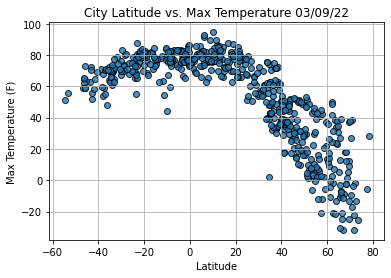

In [12]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

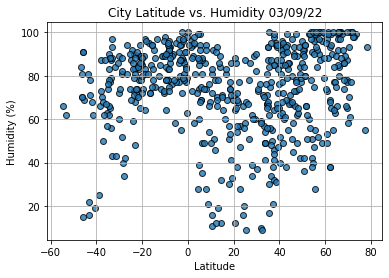

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

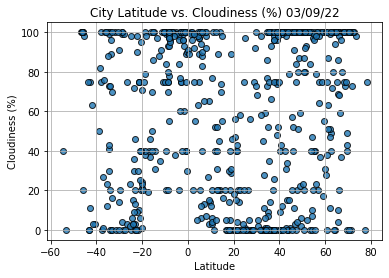

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

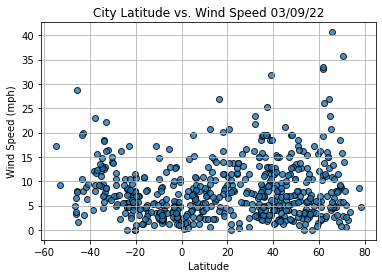

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


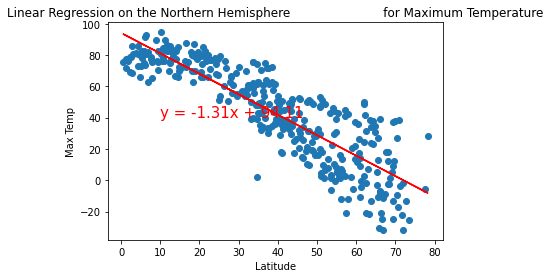

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))


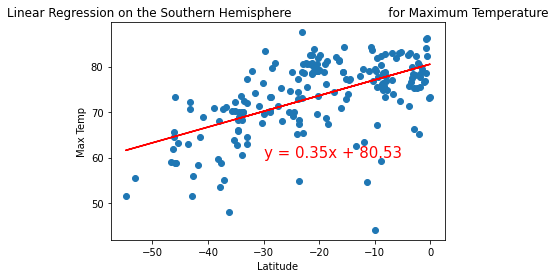

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,60))


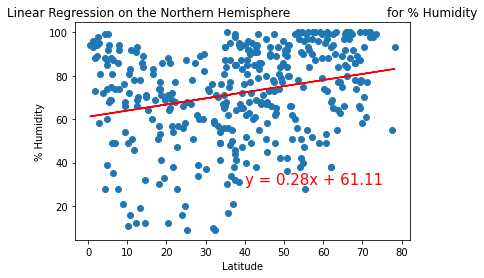

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

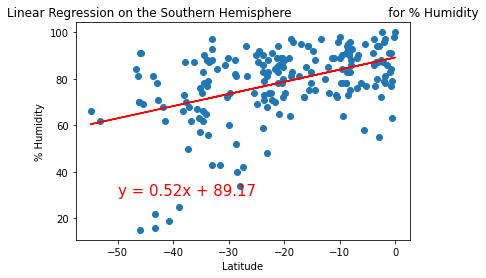

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))


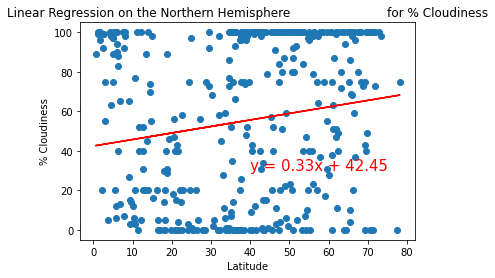

In [55]:
# Skill drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

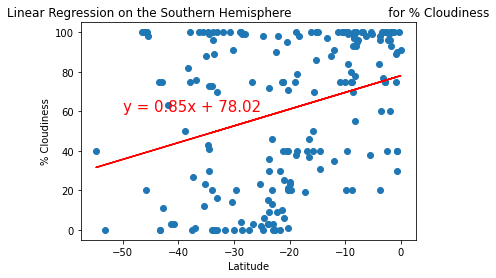

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


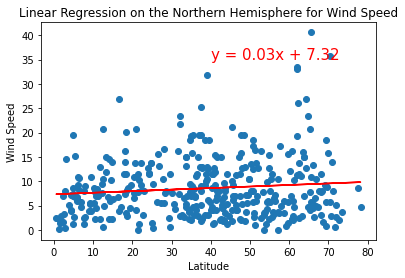

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


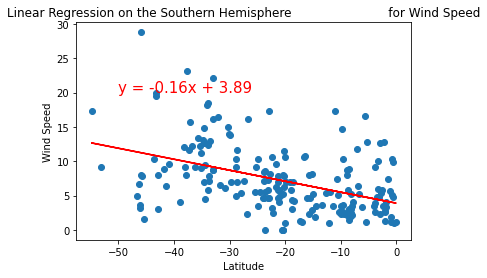

In [67]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
